In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_sentences.txt to data_sentences.txt
Saving gold.txt to gold.txt
Saving manual_tokens.txt to manual_tokens.txt
Saving test_gold.txt to test_gold.txt
Saving test_words.txt to test_words.txt
Saving train_gold.txt to train_gold.txt
Saving train_words.txt to train_words.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import defaultdict
import unicodedata as ud
import pandas as pd
import numpy as np
import re
import ast

Tạo các từ điển n_grams từ từ điển gốc.

In [ ]:
data = open("/content/Dictionary.txt", encoding="utf-8").readlines()
print(len(data))
data[0:5]

31158


['a\n', 'A\n', 'a dua\n', 'a ha\n', 'a lô\n']

In [ ]:
set_data = set(data)
print(len(set_data))

31158


In [ ]:
sorted_data = sorted(set_data)
print(len(sorted_data))

31158


In [ ]:
#Đếm số khoảng cách
def check_space(string):
    return string.count(" ")

#Tạo các n_grams
one_grams = set()
two_grams = set()
three_grams = set()
four_grams = set()
five_grams = set()
for word in sorted_data:
  word = word.replace('\n', '')
  if check_space(word) == 1:
    two_grams.add(word)
  elif check_space(word) == 2:
    three_grams.add(word)
  elif check_space(word) == 3:
    four_grams.add(word)
  elif check_space(word) == 4:
    five_grams.add(word)
  else:
    one_grams.add(word)

print(len(one_grams))

5766


In [ ]:
print(len(two_grams))
two_grams = sorted(two_grams)
two_grams[:10]

22705


['Bắc Cực',
 'Bắc Đẩu',
 'Chức Nữ',
 'Công giáo',
 'Cựu Ước',
 'Diêm Vương',
 'El Nino',
 'Hán học',
 'Hằng Nga',
 'Hồi giáo']

In [ ]:
with open("/content/my_bi_grams.txt", "w" ,encoding="utf-8") as f:
  for word in two_grams:
    f.write(f'{word}\n')

In [ ]:
print(len(three_grams))
three_grams = sorted(three_grams)
three_grams[:10]

1907


['Bà La Môn',
 'Chính Thống giáo',
 'Cơ Đốc giáo',
 'Hệ Mặt Trời',
 'Mạnh Thường Quân',
 'Thiên Chúa giáo',
 'Thái Dương Hệ',
 'Tết Nguyên Đán',
 'Tết dương lịch',
 'Tết âm lịch']

In [ ]:
with open("/content/my_tri_grams.txt", "w" ,encoding="utf-8") as f:
  for word in three_grams:
    f.write(f'{word}\n')

In [ ]:
print(len(four_grams))
four_grams = sorted(four_grams)
four_grams[:10]

763


['Bà La Môn giáo',
 'Hội chữ thập đỏ',
 'anh em thúc bá',
 'anh hùng chủ nghĩa',
 'anh hùng cá nhân',
 'bao vây kinh tế',
 'bi ba bi bô',
 'biết tỏng tòng tong',
 'bê tông cốt sắt',
 'bê tông cốt thép']

In [ ]:
with open("/content/my_quadri_grams.txt", "w" ,encoding="utf-8") as f:
  for word in four_grams:
    f.write(f'{word}\n')

In [ ]:
print(len(five_grams))
five_grams = sorted(five_grams)
five_grams[:10]

17


['bảo hiểm phi nhân thọ',
 'bộ xử lí trung tâm',
 'bộ xử lý trung tâm',
 'chủ nghĩa bôn sê vích',
 'luật tố tụng dân sự',
 'luật tố tụng hình sự',
 'máy điều hoà nhiệt độ',
 'phản xạ có điều kiện',
 'phản xạ không điều kiện',
 'thuế giá trị gia tăng']

In [ ]:
with open("/content/my_penta_grams.txt", "w" ,encoding="utf-8") as f:
  for word in five_grams:
    f.write(f'{word}\n')

In [ ]:
sentences = open("/content/data_sentences.txt", encoding="utf-8").readlines()

In [ ]:
print(len(sentences))
sentences[0:5]

53


['Phát biểu tại một diễn đàn dành riêng cho an ninh Á-Âu ở thủ đô Minsk của Belarus, ông Lavrov nhắc lại lập trường chỉ trích của Nga đối với kế hoạch chia sẻ hạt nhân của NATO. Theo kế hoạch, một phần kho vũ khí hạt nhân của Mỹ được bố trí ở nước ngoài và Washington cung cấp khóa đào tạo cho các đồng minh về cách triển khai vũ khí. Theo Ngoại trưởng Lavrov, kế hoạch trên tạo ra "nguy cơ chiến lược ngày càng gia tăng", "buộc chúng ta phải sử dụng các biện pháp đáp trả trong bối cảnh các mối đe dọa chung do NATO đặt ra ngày càng gia tăng".\n',
 'Hàng chục quả bom hạt nhân của Mỹ được cho là đang được cất giữ ở Đức, Italy, Bỉ, Hà Lan và Thổ Nhĩ Kỳ. Một số quốc gia không được Mỹ bố trí vũ khí, chẳng hạn như Ba Lan, đã tiếp nhận các khóa đào tạo về sử dụng vũ khí, động thái mà Moskva xem là một hình thức phổ biến vũ khí hạt nhân.\n',
 'Ngoại trưởng Lavrov còn cáo buộc các quốc gia phương Tây đang tiến hành "một cuộc chiến tranh hỗn hợp, công khai, nhưng dù bạn mô tả như thế nào thì đó vẫn 

## Phân tích hình thái: Tách từ tiếng Việt
Tách từ sử dụng Longest Matching

In [ ]:
#Sử dụng Regular Expression tách các âm tiết (syllables) trong mỗi câu, lưu thành 1 list
def syllablize(sentence):
    word = '\w+'
    non_word = '[^\w\s]'
    digits = '\d+([\.,_]\d+)+'
    date_or_fraction = '(\d{1,2}[/-]\d{1,2}[/-]\d{1,4}|\d{1,6}[/-]\d{1,6})'
    patterns = []
    patterns.extend([date_or_fraction, digits, word, non_word])
    patterns = f"({'|'.join(patterns)})"
    sentence = ud.normalize('NFC', sentence)
    tokens = re.findall(patterns, sentence, re.UNICODE)
    return [token[0] for token in tokens]

#Load các file n_grams đã xây dựng
def load_n_grams(path):
    with open(path, encoding='utf8') as f:
      words = f.read().split('\n')
    return words

#Thuật toán Longest Matching
def longest_matching(sentence, bi_grams, tri_grams, quadri_grams, penta_grams):
    syllables = syllablize(sentence)
    syl_len = len(syllables)

    curr_id = 0
    word_list = []
    done = False

    while curr_id < syl_len and not done:
      curr_word = syllables[curr_id]
      if curr_id >= syl_len - 1:
        word_list.append(curr_word)
        done = True
      else:
        second_word = syllables[curr_id + 1]
        pair_word = ' '.join([curr_word, second_word])
        if curr_id >= syl_len - 2:
          if (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
            word_list.append('_'.join([curr_word, second_word]))
            curr_id += 2
          else:
            word_list.append(curr_word)
            curr_id += 1
        else:
          third_word = syllables[curr_id + 2]
          triple_word = ' '.join([pair_word, third_word])
          if curr_id >= syl_len - 3:
            if (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
              word_list.append('_'.join([curr_word, second_word, third_word]))
              curr_id += 3
            elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
              word_list.append('_'.join([curr_word, second_word]))
              curr_id += 2
            else:
              word_list.append(curr_word)
              curr_id += 1
          else:
            fourth_word = syllables[curr_id + 3]
            quadra_word = ' '.join([triple_word, fourth_word])
            if curr_id >= syl_len - 4:
              if (quadra_word in quadri_grams) or (quadra_word.lower() in quadri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word]))
                curr_id += 4
              elif (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word]))
                curr_id += 3
              elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
                word_list.append('_'.join([curr_word, second_word]))
                curr_id += 2
              else:
                word_list.append(curr_word)
                curr_id += 1
            else:
              fifth_word = syllables[curr_id + 4]
              penta_word = ' '.join([quadra_word, fifth_word])
              if (penta_word in penta_grams) or (penta_word.lower() in penta_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word, fifth_word]))
                curr_id += 5
              elif (quadra_word in quadri_grams) or (quadra_word.lower() in quadri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word]))
                curr_id += 4
              elif (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word]))
                curr_id += 3
              elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
                word_list.append('_'.join([curr_word, second_word]))
                curr_id += 2
              else:
                word_list.append(curr_word)
                curr_id += 1

    return word_list

In [ ]:
#Load các file n_grams
bi_grams = load_n_grams('/content/my_bi_grams.txt')
tri_grams = load_n_grams('/content/my_tri_grams.txt')
quadri_grams = load_n_grams('/content/my_quadri_grams.txt')
penta_grams = load_n_grams('/content/my_penta_grams.txt')

#Tách từ 1 câu bất kì
longest_matching('HLV Troussier: Việt Nam rời Asian Cup 2023 với hình ảnh đẹp', bi_grams, tri_grams, quadri_grams, penta_grams)

['HLV',
 'Troussier',
 ':',
 'Việt',
 'Nam',
 'rời',
 'Asian',
 'Cup',
 '2023',
 'với',
 'hình_ảnh',
 'đẹp']

In [ ]:
#Tiến hành tách từ trên dữ liệu thu thập, ghi vào file
with open('/content/longest_matching_tokens.txt', 'w', encoding='utf-8') as f:
    longest_matching_sentences = []
    for sentence in sentences:
        word_list = longest_matching(sentence, bi_grams, tri_grams, quadri_grams, penta_grams)
        longest_matching_sentences.append(' '.join(word_list))
        for word in word_list:
          f.write(word + '\n')
        if sentence != sentences[-1]: f.write('\n')
    f.write('\n')
longest_matching_sentences[:3]

['Phát_biểu tại một diễn_đàn dành riêng cho an_ninh Á - Âu ở thủ_đô Minsk của Belarus , ông Lavrov nhắc lại lập_trường chỉ_trích của Nga đối_với kế_hoạch chia_sẻ hạt_nhân của NATO . Theo kế_hoạch , một phần kho vũ_khí_hạt_nhân của Mỹ được bố_trí ở nước_ngoài và Washington cung_cấp khóa đào_tạo cho các đồng_minh về cách triển_khai vũ_khí . Theo Ngoại_trưởng Lavrov , kế_hoạch trên tạo ra " nguy_cơ chiến_lược ngày_càng gia_tăng " , " buộc chúng_ta phải sử_dụng các biện_pháp đáp trả trong bối_cảnh các mối đe dọa chung do NATO đặt ra ngày_càng gia_tăng " .',
 'Hàng chục quả bom hạt_nhân của Mỹ được cho là đang được cất_giữ ở Đức , Italy , Bỉ , Hà Lan và Thổ Nhĩ Kỳ . Một_số quốc_gia không được Mỹ bố_trí vũ_khí , chẳng_hạn như Ba Lan , đã tiếp_nhận các khóa đào_tạo về sử_dụng vũ_khí , động_thái mà Moskva xem là một hình_thức phổ_biến vũ_khí_hạt_nhân .',
 'Ngoại_trưởng Lavrov còn cáo_buộc các quốc_gia phương Tây đang tiến_hành " một cuộc_chiến tranh hỗn_hợp , công_khai , nhưng dù bạn mô_tả như

In [ ]:
#Đếm số từ ghép tách được
count_longest_matching_compounds = 0
for sentence in longest_matching_sentences:
    for word in sentence.split():
        if '_' in word: count_longest_matching_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching:', count_longest_matching_compounds)

Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching: 907


In [ ]:
!pip install vncorenlp
!pip install py_vncorenlp

In [ ]:
import py_vncorenlp
py_vncorenlp.download_model()
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"])

FileExistsError: [Errno 17] File exists: './models'

In [ ]:
#Tách từ trên dữ liệu thu thập với VnCoreNLP, ghi vào file
with open('/content/vncore_tokens.txt', 'w', encoding='utf-8') as f:
    vncore_sentences = []
    for sentence in sentences:
        word_list = rdrsegmenter.word_segment(sentence)
        vncore_sentences.append(' '.join(word_list))
        for word in word_list:
          s = ""
          for i in range(len(word)):
            if word[i] != " " and word[i] != "." or (word[i] == "." and i+1 < len(word) and word[i+1] != " "):
              s += word[i]
            elif word[i] == ".":
              f.write("." + "\n")
            else:
              f.write(s + "\n")
              s = ""
        if sentence != sentences[-1]:
          f.write('\n')
    f.write('\n')

vncore_sentences[:3]

['Phát_biểu tại một diễn_đàn dành riêng cho an_ninh Á-Âu ở thủ_đô Minsk của Belarus , ông Lavrov nhắc lại lập_trường chỉ_trích của Nga đối_với kế_hoạch chia_sẻ hạt_nhân của NATO . Theo kế_hoạch , một phần kho vũ_khí_hạt_nhân của Mỹ được bố_trí ở nước_ngoài và Washington cung_cấp khoá đào_tạo cho các đồng_minh về cách triển_khai vũ_khí . Theo Ngoại_trưởng Lavrov , kế_hoạch trên tạo ra " nguy_cơ chiến_lược ngày_càng gia_tăng " , " buộc chúng_ta phải sử_dụng các biện_pháp đáp trả trong bối_cảnh các mối đe_doạ chung do NATO đặt ra ngày_càng gia_tăng " .',
 'Hàng chục quả bom hạt_nhân của Mỹ được cho là đang được cất_giữ ở Đức , Italy , Bỉ , Hà_Lan và Thổ_Nhĩ_Kỳ . Một_số quốc_gia không được Mỹ bố_trí vũ_khí , chẳng_hạn như Ba_Lan , đã tiếp_nhận các khoá đào_tạo về sử_dụng vũ_khí , động_thái mà Moskva xem là một hình_thức phổ_biến vũ_khí_hạt_nhân .',
 'Ngoại_trưởng Lavrov còn cáo_buộc các quốc_gia phương Tây đang tiến_hành " một cuộc chiến_tranh hỗn_hợp , công_khai , nhưng dù bạn mô_tả như_t

In [ ]:
count_vncore_compounds = 0
for sentence in vncore_sentences:
    for word in sentence.split():
        if '_' in word: count_vncore_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP:', count_vncore_compounds)

Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP: 1023


In [ ]:
!pip install pyvi

In [ ]:
from pyvi import ViTokenizer, ViPosTagger
#Tách từ sử dụng thư viện pyvi (ViTokenizer), ghi kết quả vào file
with open('/content/pyvi_tokens.txt', 'w', encoding='utf-8') as f:
    pyvi_tokenize_sentences = []
    for sentence in sentences:
      word_list = ViTokenizer.tokenize(sentence)
      pyvi_tokenize_sentences.append(word_list)
      for word in word_list.split():
          f.write(word + '\n')
      if sentence != sentences[-1]:
        f.write('\n')
    f.write('\n')
pyvi_tokenize_sentences[:3]

['Phát_biểu tại một diễn_đàn dành riêng cho an_ninh Á - Âu ở thủ_đô Minsk của Belarus , ông Lavrov_nhắc lại lập_trường chỉ_trích của Nga đối_với kế_hoạch chia_sẻ hạt_nhân của NATO. Theo kế_hoạch , một phần kho vũ_khí hạt_nhân của Mỹ được bố_trí ở nước_ngoài và Washington cung_cấp khóa đào_tạo cho các đồng_minh về cách triển_khai vũ_khí . Theo Ngoại_trưởng Lavrov , kế_hoạch trên tạo ra " nguy_cơ chiến_lược ngày_càng gia_tăng " , " buộc chúng_ta phải sử_dụng các biện_pháp đáp trả trong bối_cảnh các mối đe_dọa chung do NATO đặt ra ngày_càng gia_tăng " . \n',
 'Hàng chục quả bom hạt_nhân của Mỹ được cho là đang được cất_giữ ở Đức , Italy , Bỉ , Hà_Lan và Thổ_Nhĩ_Kỳ . Một_số quốc_gia không được Mỹ bố_trí vũ_khí , chẳng_hạn như Ba_Lan , đã tiếp_nhận các khóa đào_tạo về sử_dụng vũ_khí , động_thái mà Moskva xem là một hình_thức phổ_biến vũ_khí hạt_nhân . \n',
 'Ngoại_trưởng Lavrov còn cáo_buộc các quốc_gia phương Tây đang tiến_hành " một cuộc chiến_tranh hỗn_hợp , công_khai , nhưng dù bạn mô_t

In [ ]:
count_pyvi_compounds = 0
for sentence in  pyvi_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: count_pyvi_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện pyvi:', count_pyvi_compounds)

Số lượng từ ghép khi tách từ bằng thư viện pyvi: 999


In [ ]:
#Tải file tách từ thủ công
with open('/content/manual_tokens.txt', 'r', encoding='utf-8') as f:
    manual_tokenize_sentences = []
    sentence = ''
    for word in f:
        if word == '\n':
            manual_tokenize_sentences.append(sentence.strip())
            sentence = ''
        else:
          sentence += word.replace('\n', ' ')

manual_tokenize_sentences[:3]

['Phát_biểu tại một diễn_đàn dành riêng cho an_ninh Á-Âu ở thủ_đô Minsk của Belarus , ông Lavrov nhắc lại lập_trường chỉ_trích của Nga đối_với kế_hoạch chia_sẻ hạt_nhân của NATO .',
 'Theo kế_hoạch , một phần kho vũ_khí_hạt_nhân của Mỹ được bố_trí ở nước_ngoài và Washington cung_cấp khoá đào_tạo cho các đồng_minh về cách triển_khai vũ_khí .',
 'Theo Ngoại_trưởng Lavrov , kế_hoạch trên tạo ra " nguy_cơ chiến_lược ngày_càng gia_tăng " , " buộc chúng_ta phải sử_dụng các biện_pháp đáp trả trong bối_cảnh các mối đe_doạ chung do NATO đặt ra ngày_càng gia_tăng " .']

In [ ]:
count_manual_tokenize_compounds = 0
for sentence in manual_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: count_manual_tokenize_compounds += 1
print('Số lượng từ ghép khi tách từ thủ công:', count_manual_tokenize_compounds)

Số lượng từ ghép khi tách từ thủ công: 1025


#Đánh giá tách từ

In [ ]:
#Hàm đếm số từ đúng
def count_correct_words(pred, source, n_grams=5):
    pred_words = pred.split()
    source_words = source.split()

    total_true, tp = 0, 0
    total_errors, fp = 0, 0

    idx = 0
    while idx < len(pred_words):
        if pred_words[idx] not in source_words[idx:(idx + n_grams)]:
            if '_' in pred_words[idx]: fp += 1
            del pred_words[idx]
            total_errors += 1
        else: idx += 1

    idx = 0
    while idx < len(source_words):
        if source_words[idx] not in pred_words[idx:(idx + n_grams)]:
            del source_words[idx]
        else: idx += 1

    if len(pred_words) < len(source_words): words = pred_words
    else: words = source_words

    for idx in range (len(words)):
        if pred_words[idx] == source_words[idx]:
            if '_' in pred_words[idx]: tp += 1
            total_true += 1

    return total_true, total_errors, tp, fp

In [ ]:
#Hàm đánh giá tách từ
'''
  Dựa trên các thang đo:
    - Accuracy
    - Presition
    - Recall
'''
def tokenize_evaluation(pred, source, n_grams=5):
    total_true = 0
    total_errors = 0
    total_words = 0

    pred_tp = 0
    pred_fp = 0

    for pred_sentence, source_sentence in zip(pred, source):
        total_words += len(source_sentence.split())
        if pred_sentence != source_sentence:
            true, error, tp, fp = count_correct_words(pred_sentence, source_sentence, n_grams)
            total_true += true
            total_errors += error
            pred_tp += tp
            pred_fp += fp
        else:
            for word in source_sentence.split():
                if '_' in word: pred_tp += 1
                total_true += 1
    return {
        'Accuracy': total_true / total_words,
        'Precision': pred_tp / (pred_tp + pred_fp),
        'Recall': pred_tp / count_manual_tokenize_compounds,
        'True Positive': pred_tp,
        'False Positive': pred_fp,
        'Total True': total_true,
        'Total Errors': total_errors,
        'Total Words': total_words
    }

In [ ]:
#Đọc các file tách từ
def read_file_tokens(filepath):
  with open(filepath, 'r', encoding='utf-8') as f:
    array = []
    sentence = ''
    for word in f:
        if word == '\n':
            array.append(sentence.strip())
            sentence = ''
        else:
          sentence += word.replace('\n', ' ')
  return array

#So sánh giữa các phương pháp tách từ
longest_matching_sentences = read_file_tokens('/content/longest_matching_tokens.txt')
vncore_sentences = read_file_tokens('/content/vncore_tokens.txt')
pyvi_tokenize_sentences = read_file_tokens('/content/pyvi_tokens.txt')
manual_tokenize_sentences = read_file_tokens('/content/manual_tokens.txt')

longest_matching_evaluation = tokenize_evaluation(longest_matching_sentences, manual_tokenize_sentences)
vncore_evaluation = tokenize_evaluation(vncore_sentences, manual_tokenize_sentences)
pyvi_evaluation = tokenize_evaluation(pyvi_tokenize_sentences, manual_tokenize_sentences)
pd.DataFrame(
    [longest_matching_evaluation, pyvi_evaluation, vncore_evaluation],
    index = ['Longest Matching', 'Pyvi', "VnCoreNLP"]
).astype(object).T

,Longest Matching,Pyvi,VnCoreNLP
Accuracy,0.062373,0.059661,0.063051
Precision,0.01547,0.014042,0.013712
Recall,0.013659,0.013659,0.013659
True Positive,14,14,14
False Positive,891,983,1007
Total True,92,88,93
Total Errors,3663,3552,3497
Total Words,1475,1475,1475


In [ ]:
longest_matching_tokens = open('/content/longest_matching_tokens.txt', encoding='utf-8').readlines()
vncore_tokens = open('/content/vncore_tokens.txt', encoding='utf-8').readlines()
pyvi_tokens = open('/content/pyvi_tokens.txt', encoding='utf-8').readlines()
manual_tokens = open('/content/manual_tokens.txt', encoding='utf-8').readlines()

In [ ]:
len(longest_matching_tokens)

3833

In [ ]:
len(vncore_tokens)

3667

In [ ]:
len(pyvi_tokens)

3721

## Phân tích văn phạm: Gán nhãn từ loại tiếng Việt
Tạo ngữ liệu cho gán nhãn từ loại

In [ ]:
#Đọc dữ liệu gán nhãn thủ công
gold_data = open('/content/drive/MyDrive/Do_an_CS211/data/Thu_cong/Da_gan_nhan.txt', encoding='utf-8').readlines()
new_line_idx = [i for i, item in enumerate(manual_tokens) if item == '\n']

Chia thành 2 tập train và test

In [ ]:
with open('/content/drive/MyDrive/Do_an_CS211/data/train_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[102]]:
      f.write(line)
    f.write('\n')

with open('/content/drive/MyDrive/Do_an_CS211/data/test_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[102] + 1:]:
      f.write(line)

In [ ]:
with open('/content/drive/MyDrive/Do_an_CS211/data/train_words.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[102]]:
      f.write(re.sub('\t.*', '', line))
    f.write('\n')

with open('/content/drive/MyDrive/Do_an_CS211/data/test_words.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[102] + 1:]:
      f.write(re.sub('\t.*', '', line))

In [ ]:
#Hàm xử lý
'''
  Xử lý và lưu trữ dữ liệu từ các file train_words, test_words.
    - Đặt mã '--n--' biểu thị kết thúc 1 câu (thay cho '\n')
    - Đặt mã '--unk--' biểu thị từ không nằm trong bộ từ vựng (vocabs), thực hiện trên test_words
    - Trong train_words, các từ đều đã được xử lý để nằm trong bộ từ vựng
'''
def preprocess(vocabs_dict, path):
    data = []
    file = open(path, encoding='utf-8').readlines()

    for index, word in enumerate(file):
        if not word.split():
            word = '--n--'
            data.append(word)
            continue
        elif word.strip() not in vocabs_dict:
            word = '--unk--'
            data.append(word)
            continue
        data.append(word.strip())
    return data

In [ ]:
#Hàm vẽ biểu đồ thống kê số lượng nhãn
def plot_tag_counts(gold):
    tags = [word_tag.split()[1] for word_tag in gold if word_tag.split()]
    tag_counts = pd.DataFrame(tags)[0].value_counts()
    tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5))
    return pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum())

In [ ]:
#Đọc bộ từ vựng
vocabs = open('/content/vocabs.txt', encoding='utf-8').read().split('\n')
vocabs_dict = {}
index = 0

for word in sorted(vocabs):
    if word not in vocabs_dict:
        vocabs_dict[word] = index
        index += 1

In [ ]:
print('Số lượng từ vựng:', len(vocabs_dict.keys()))
count = 0

for key, value in vocabs_dict.items():
    print(f'{key}: {value}')
    count += 1
    if count > 20: break

Số lượng từ vựng: 55008
: 0
!: 1
": 2
#: 3
$: 4
%: 5
&: 6
': 7
'': 8
'40s: 9
'60s: 10
'70s: 11
'80s: 12
'86: 13
'90s: 14
'N: 15
'S: 16
'd: 17
'em: 18
'll: 19
'm: 20


In [ ]:
#Đọc file train_gold: Gồm từ vựng kèm nhãn của 60 câu đầu
train_gold = open('/content/drive/MyDrive/Do_an_CS211/data/train_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập train_gold:', len(train_gold))
train_gold[0:5]

Số lượng từ trong tập train_gold: 2849


['Phát_biểu\tV\n', 'tại\tE\n', 'một\tM\n', 'diễn_đàn\tN\n', 'dành\tV\n']

In [ ]:
#Đọc file train_words: Chỉ gồm từ vựng của 60 câu đầu, dùng để đánh giá huấn luyện
train_words = preprocess(vocabs_dict, '/content/drive/MyDrive/Do_an_CS211/data/train_words.txt')
print('Số lượng từ trong tập train_words:', len(train_words))
train_words[0:5]

Số lượng từ trong tập train_words: 2849


['--unk--', 'tại', 'một', 'diễn_đàn', 'dành']

Các từ không nằm trong vocabs: Phát_biểu, Á-Âu, Minsk, Belarus, Lavrov, khóa, Ngoại_trưởng, Lavrov, đáp_trả, dọa, bom_hạt_nhân, Bỉ, Hà_Lan, Thổ_Nhĩ_Kỳ, Một_số, Ba_Lan, khóa, Moskva, Ngoại_trưởng, Lavrov, phương_Tây, Ngoại_trưởng, Lavrov, Hành_vi, phương_Tây, …, Lavrov, phương_Tây, Á-Âu, Moskva, Lisbon, Vladivostok, Người, Nhưng, Lavrov, cho_phép, dọa, Ngoại_trưởng, địa_chính_trị, phương_Tây, phó_vương, Chúa, An_ninh, Hợp_tác, OSCE, Ngoại_trưởng, Lavrov, cho_phép, Ngoại_trưởng, Lavrov, OSCE, Liên_minh, EU, Nhà_ngoại_giao, đồng_cấp, Peter_Szijjarto, Belarus, Lavrov, Tây, Moskva, tầm_nhìn, Ngoại_trưởng, ‘, ’, Pháp, Emmanuel_Macron, nhà_lãnh_đạo, Hằng, Phong_Nha, Kẻ_Bàng, Suốt, Cứu_hộ, Sinh_vật, Vườn_Quốc_gia, VQG, Phong_Nha, Kẻ_Bàng, Quảng_Bình, Nhờ, Lê_Thuận_Kiên, Bộ_phận, Nghiên_cứu, Sinh_vật, nước_uống, VQG, Phong_Nha, Kẻ_Bàng, Sáng, Tân_Trạch, Bố_Trạch, bách_xanh_đá, Sách_Đỏ, Bách_xanh_đá, VQG, Phong_Nha, Kẻ_Bàng, Loài, karst, mây_trời, Để, Kiên, trơn_trượt, Kiên, bách_xanh_đá, Phong_

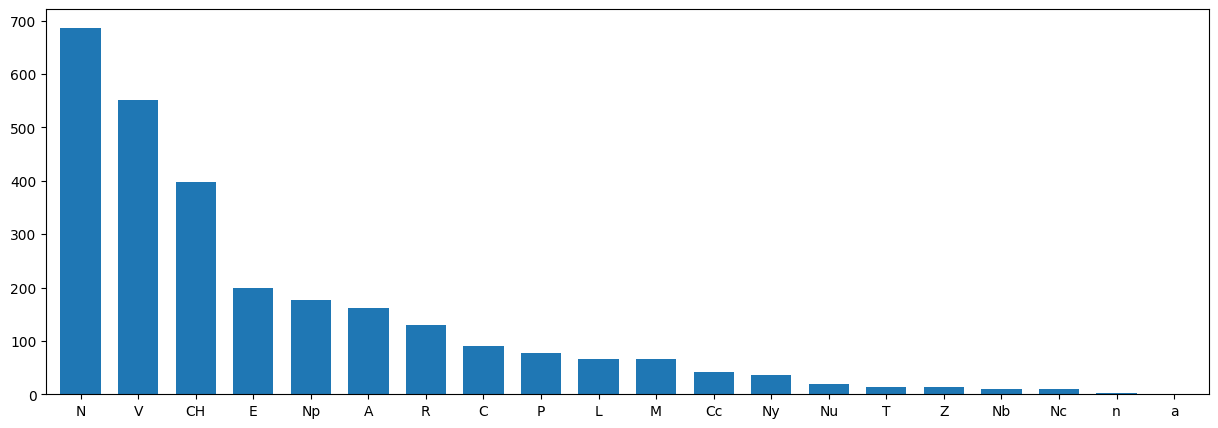

In [ ]:
print('Các từ không nằm trong vocabs', end=': ')
k = 0
for word_tag, word in zip(train_gold, train_words):
    if word == '--unk--':
      k += 1
      print(word_tag.split()[0], end=', ')
plot_tag_counts(train_gold)
print('\n')
print(k)

In [ ]:
#Đọc file test_gold: gồm từ vựng và nhãn của 30 câu còn lại, dùng để đánh giá kiểm thử
test_gold = open('/content/drive/MyDrive/Do_an_CS211/data/test_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập test_gold:', len(test_gold))
test_gold[0:5]

Số lượng từ trong tập test_gold: 870


['phân_bổ\tN\n', 'số\tN\n', 'tiền\tN\n', 'hơn\tA\n', '100\tM\n']

In [ ]:
#Đọc file test_words: chỉ gồm từ vựng của 30 câu còn lại, dùng để kiểm thử
test_words = preprocess(vocabs_dict, '/content/drive/MyDrive/Do_an_CS211/data/test_words.txt')
print('Số lượng từ trong tập test_words:', len(test_words))
test_words[0:5]

Số lượng từ trong tập test_words: 870


['phân_bổ', 'số', 'tiền', 'hơn', '100']

Các từ không nằm trong vocabs: MTTQ, Nghị_định, 2021, Đến, Chia_sẻ, Cựu, Thủ_tướng, Mykola_Azarov, Chẳng_hạn, Ngoại_trưởng, Antony_Blinken, Trước_tiên, hủy, Tiếp, Moskva, Và, Kiev, Thủ_tướng, Ukraine_Azarov, Kiev, Kiev, 0, Azarov, sau_khi, Vì_vậy, Moskva, Kiev, Hơn_nữa, Volodymyr_Zelensky, Petro_oroshenko, Cựu, Thủ_tướng, Mykola_Azarov, Thay, hóa, nhà_khoa_học, Kiev, Và, hóa, Từ, Cựu, Thủ_tướng, Mykola_Azarov, Liên_quan, Lực_lượng, Vũ_trang, Cựu, Thủ_tướng, Mykola_Azarov, Hãy, Lực_lượng, Vũ_trang, Melitopol, Crimea, Vâng, Có_lẽ, Nhưng, Azarov, Và, Kiev, Qua, trích_xuất, Vũng_Tàu, Bà_Rịa, Vũng_Tàu, biển_số, 30/10, Thượng_tá, Nguyễn_Văn_Thao, Cơ_quan, CSĐT, Vũng_Tàu, Người, ADIDAS, Pit_bull, Hai, Airblade, biển_số, khắc_chữ, bình_sơn, Để, Cơ_quan, CSĐT, Vũng_Tàu, pano, CNC, 28/10, Như, VietNamNet, 29/10, Vũng_Tàu, Lê_Lợi, Trần_Hưng_Đạo, Nội_dung, Không_chỉ, 

95


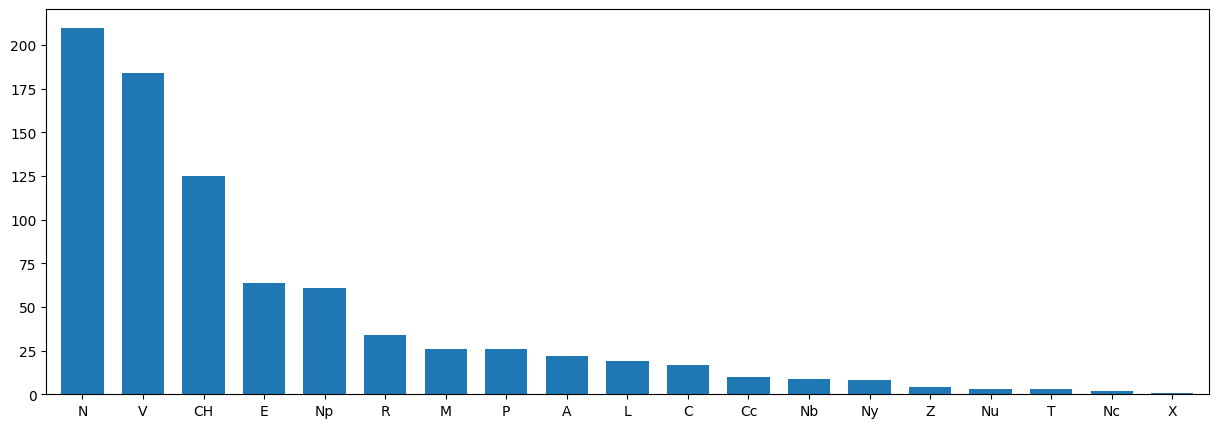

In [ ]:
print('Các từ không nằm trong vocabs', end=': ')
k = 0
for word_tag, word in zip(test_gold, test_words):
    if word == '--unk--':
      k += 1
      print(word_tag.split()[0], end=', ')
plot_tag_counts(test_gold)
print('\n')
print(k)

Tạo các từ điển Transition Counts, Emission Counts, Tag Counts

In [ ]:
#Hàm tách từ vựng và nhãn
def seperate_word_tag(word_tag, vocabs_dict):
    if not word_tag.split():
        word = '--n--'
        tag = '--s--'
    else:
        word, tag = word_tag.split()
        if word not in vocabs_dict:
          word = '--unk--'
    return word, tag

#Hàm xây dựng các từ điển (ctdl defaultdict)
'''
  transition_counts: Đếm số lần chuyển đổi trạng thái (chuyển đổi giữa 2 nhãn)
  emission_counts: Đếm số lần thể hiện nhãn trên 1 từ vựng
  tag_counts: Đếm số lần xuất hiện của 1 nhãn
  Đặt mã '--s--' là nhãn biểu thị bắt đầu 1 câu
'''
def create_dictionaries(train_gold, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)

    prev_tag = '--s--'
    for word_tag in train_gold:
        word, tag = seperate_word_tag(word_tag, vocab)

        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, word)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
    return transition_counts, emission_counts, tag_counts

transition_counts, emission_counts, tag_counts = create_dictionaries(train_gold, vocabs_dict)
states = sorted(tag_counts.keys())
print('Số nhãn:', len(states))
print(states)

Số nhãn: 21
['--s--', 'A', 'C', 'CH', 'Cc', 'E', 'L', 'M', 'N', 'Nb', 'Nc', 'Np', 'Nu', 'Ny', 'P', 'R', 'T', 'V', 'Z', 'a', 'n']


In [ ]:
tag_counts

defaultdict(int,
            {'V': 551,
             'E': 199,
             'M': 66,
             'N': 687,
             'A': 162,
             'T': 13,
             'Np': 176,
             'CH': 398,
             'R': 130,
             'Nc': 9,
             'Ny': 36,
             '--s--': 100,
             'Cc': 41,
             'L': 67,
             'P': 78,
             'C': 90,
             'Z': 13,
             'n': 3,
             'a': 1,
             'Nu': 19,
             'Nb': 10})

In [ ]:
print("Transition examples: ")
for example in list(transition_counts.items())[:15]:
    print(example)

Transition examples: 
(('--s--', 'V'), 16)
(('V', 'E'), 50)
(('E', 'M'), 9)
(('M', 'N'), 41)
(('N', 'V'), 127)
(('V', 'A'), 47)
(('A', 'T'), 1)
(('T', 'N'), 4)
(('N', 'Np'), 75)
(('Np', 'E'), 13)
(('E', 'N'), 90)
(('E', 'Np'), 16)
(('Np', 'CH'), 78)
(('CH', 'N'), 84)
(('Np', 'V'), 43)


In [ ]:
print("Emission examples: ")
for example in list(emission_counts.items())[:15]:
    print (example)

Emission examples: 
(('V', '--unk--'), 21)
(('E', 'tại'), 6)
(('M', 'một'), 18)
(('N', 'diễn_đàn'), 1)
(('V', 'dành'), 2)
(('A', 'riêng'), 3)
(('T', 'cho'), 8)
(('N', 'an_ninh'), 5)
(('Np', '--unk--'), 137)
(('E', 'ở'), 22)
(('N', 'thủ_đô'), 1)
(('E', 'của'), 32)
(('CH', ','), 188)
(('N', 'ông'), 8)
(('V', 'nhắc'), 1)


Thử nghiệm gán nhãn: Gãn nhãn xuất hiện thường xuyên nhất

In [ ]:
#Hàm dự đoán nhãn thường xuyên nhất (dựa vào emission_counts)
def predict_pos(words, golds, emission_counts, vocabs_dict, states):
    num_correct = 0
    all_words = set(emission_counts.keys())

    for word, gold in zip(words, golds):
        gold_list = gold.split()
        if len(gold_list) != 2:
          continue
        else:
          true_label = gold_list[1]

        count_final = 0
        pos_final = ''
        if word not in vocabs_dict:
          continue

        for pos in states:
            if (pos, word) not in emission_counts:
              continue
            count = emission_counts[(pos, word)]

            if count > count_final:
                count_final = count
                pos_final = pos

        if pos_final == true_label:
          num_correct += 1
    accuracy = num_correct / len(golds)
    return accuracy

accuracy = predict_pos(train_words, train_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập train:', accuracy)

Độ chính xác trên tập train: 0.8831168831168831


In [ ]:
accuracy = predict_pos(test_words, test_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập test:', accuracy)

Độ chính xác trên tập test: 0.5977011494252874


Tạo các ma trận Transition (A), Emission (B) cho mô hình Hidden Markov

In [ ]:
#Hàm tạo ma trận chuyển đổi trạng thái A (từ transition_counts)
def create_transition_matrix(alpha, tag_counts, transition_counts):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(all_tags)

    A = np.zeros((num_tags, num_tags))
    trans_keys = set(transition_counts.keys())

    for i in range(num_tags):
        for j in range(num_tags):
            count = 0
            key = (all_tags[i], all_tags[j])
            if key in transition_counts:
              count = transition_counts[key]

            count_prev_tag = tag_counts[all_tags[i]]
            A[i, j] = (count + alpha) / (count_prev_tag + alpha * num_tags)
    return A


alpha = 0.1 #Laplace smoothing
for i in range(len(states)):
  tag_counts.pop(i, None)

A = create_transition_matrix(alpha, tag_counts, transition_counts)
df = pd.DataFrame(
    A[:10, :10],
    index = states[:10],
    columns = states[:10]
)

df

,--s--,A,C,CH,Cc,E,L,M,N,Nb
--s--,0.000979,0.049951,0.098923,0.059745,0.000979,0.079334,0.030362,0.030362,0.363369,0.020568
A,0.000609,0.043266,0.055454,0.329677,0.037172,0.128580,0.024985,0.049360,0.122486,0.000609
C,0.001086,0.011944,0.055375,0.174810,0.001086,0.077090,0.011944,0.022801,0.218241,0.001086
CH,0.247688,0.035241,0.047738,0.072732,0.012747,0.045239,0.015246,0.015246,0.210197,0.005249
Cc,0.002320,0.048724,0.002320,0.025522,0.002320,0.002320,0.095128,0.002320,0.187935,0.025522
E,0.000497,0.020388,0.005470,0.045251,0.005470,0.015415,0.060169,0.045251,0.448036,0.010443
L,0.001447,0.001447,0.015919,0.001447,0.001447,0.001447,0.015919,0.001447,0.811867,0.015919
M,0.001468,0.001468,0.001468,0.074890,0.001468,0.001468,0.001468,0.060206,0.603524,0.001468
N,0.001596,0.095922,0.019010,0.124946,0.014657,0.097373,0.010303,0.017559,0.214918,0.000145
Nb,0.008264,0.008264,0.008264,0.173554,0.008264,0.008264,0.008264,0.008264,0.173554,0.090909


In [ ]:
A.shape

(21, 21)

In [ ]:
#Xây dựng ma trận thể hiện / phát xạ B (dựa trên emission_counts)
def create_emission_matrix(alpha, tag_counts, emission_counts, vocabs):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(tag_counts)
    num_words = len(vocabs)

    B = np.zeros((num_tags, num_words))
    emis_keys = set(list(emission_counts.keys()))

    for i in range(num_tags):
        for j in range(num_words):
            count = 0
            key = (all_tags[i], vocabs[j])
            if key in emission_counts.keys():
              count = emission_counts[key]

            count_tag = tag_counts[all_tags[i]]
            B[i, j] = (count + alpha) / (count_tag + alpha * num_words)
    return B

cidx  = ['Đồng_bằng', 'sông', 'Cửu_Long', 'được', 'ưu_tiên', 'bố_trí', 'vốn', 'đầu_tư', 'các', 'tuyến', 'cao_tốc', '--unk--']
rvals = ['N', 'V', 'CH', 'Cc', 'A', 'L', 'Np', 'Nc', 'CH']
cols = [vocabs_dict[word] for word in cidx]
rows = [states.index(tag) for tag in rvals]

for i in range(len(states)):
  tag_counts.pop(i, None)
B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocabs_dict))

df = pd.DataFrame(B[np.ix_(rows, cols)], index=rvals, columns=cidx)
df

,Đồng_bằng,sông,Cửu_Long,được,ưu_tiên,bố_trí,vốn,đầu_tư,các,tuyến,cao_tốc,--unk--
N,0.000016,0.000016,0.000016,0.000016,0.000016,0.000178,0.000178,0.000178,0.000016,0.000016,0.000016,0.011006
V,0.000017,0.000017,0.000017,0.004974,0.000017,0.000182,0.000017,0.000017,0.000017,0.000017,0.000017,0.003487
CH,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000865
Cc,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
A,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000724
L,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.006304,0.000018,0.000018,0.000198
Np,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.024151
Nc,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000381
CH,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000865


In [ ]:
A = np.array([sublist[1:].tolist() for sublist in A]) #Xóa bớt cột --s--
B = B[1:]

In [ ]:
df = pd.DataFrame(
    A[:5, :5],
    index = states[:5],
    columns = states[1:6]
)
df

,A,C,CH,Cc,E
--s--,0.049951,0.098923,0.059745,0.000979,0.079334
A,0.043266,0.055454,0.329677,0.037172,0.128580
C,0.011944,0.055375,0.174810,0.001086,0.077090
CH,0.035241,0.047738,0.072732,0.012747,0.045239
Cc,0.048724,0.002320,0.025522,0.002320,0.002320


In [ ]:
A.shape

(21, 20)

In [ ]:
B.shape

(20, 55008)

Khởi tạo thuật toán Viterbi

In [ ]:
#Hàm khởi tạo Viterbi, tính toán giá trị khởi tạo cho cột đầu tiên
def viterbi_initialize(states, tag_counts, A, B, corpus, vocabs_dict):
    num_tags = len(tag_counts)
    s_idx = states.index('--s--') #s_idx = 0

    best_probs = np.zeros((num_tags, len(corpus)))
    best_paths = np.zeros((num_tags, len(corpus)), dtype=int)
    index = vocabs_dict[corpus[0]]
    for i in range(num_tags):
        if A[s_idx, i - 1] == 0:
          best_probs[i, 0] = float('-inf')
        else:
          best_probs[i, 0] = np.log(A[s_idx, i - 1]) + np.log(B[i - 1, index])
    return best_probs, best_paths

In [ ]:
best_probs_train, best_paths_train = viterbi_initialize(states, tag_counts, A, B, train_words, vocabs_dict)
print('best_probs_train[0, 0]:', best_probs_train[0, 0])
print('best_paths_train[0, 0]:', best_paths_train[0, 0])

best_probs_train[0, 0]: -17.844316952902375
best_paths_train[0, 0]: 0


In [ ]:
best_probs_train.shape

(21, 2849)

In [ ]:
best_paths_train.shape

(21, 2849)

In [ ]:
best_probs_test, best_paths_test = viterbi_initialize(states, tag_counts, A, B, test_words, vocabs_dict)
print('best_probs_test[0, 0]:', best_probs_test[0, 0])
print('best_paths_test[0, 0]:', best_paths_test[0, 0])

best_probs_test[0, 0]: -17.844316952902375
best_paths_test[0, 0]: 0


In [ ]:
best_probs_test.shape

(21, 870)

In [ ]:
best_paths_test.shape

(21, 870)

Forward

In [ ]:
#Hàm Viterbi Forward tiến hành điền các giá trị còn lại theo chiến lược quy hoạch động
def viterbi_forward(A, B, corpus, best_probs, best_paths, vocabs_dict):
    num_tags = best_probs.shape[0]

    for i in range(1, len(corpus)):
        if i % 5000 == 0:
          print(f'Processed {i} words...')

        for j in range(num_tags):
            best_prob_i = float('-inf')
            best_path_i = None

            for k in range(num_tags):
                index = vocabs_dict[corpus[i]]
                prob = best_probs[k, i - 1] + np.log(A[k, j - 1]) + np.log(B[j - 1, index])

                if prob > best_prob_i:
                    best_prob_i = prob
                    best_path_i = k

            best_probs[j, i] = best_prob_i
            best_paths[j, i] = best_path_i

    return best_probs, best_paths


In [ ]:
best_probs_train, best_paths_train = viterbi_forward(A, B, train_words, best_probs_train, best_paths_train, vocabs_dict)
print('best_probs_train[0, 1]:', best_probs_train[0, 1])
print('best_paths_train[0, 4]:', best_paths_train[0, 4])

best_probs_train[0, 1]: -22.87754878624839
best_paths_train[0, 4]: 8


In [ ]:
best_probs_test, best_paths_test = viterbi_forward(A, B, test_words, best_probs_test, best_paths_test, vocabs_dict)
print('best_probs_test[0, 1]:', best_probs_test[0, 1])
print('best_paths_test[0, 4]:', best_paths_test[0, 4])

best_probs_test[0, 1]: -28.95774541385704
best_paths_test[0, 4]: 1


Backward

In [ ]:
#Hàm Viterbi Backward truy vết trên bảng tìm đường đi tốt nhất
def viterbi_backward(best_probs, best_paths, corpus, states):
    m = best_paths.shape[1]
    z = [None] * m
    pred = [None] * m

    best_prob_for_last_word = float('-inf')
    num_tags = best_probs.shape[0]

    for k in range(num_tags):
        if best_probs[k, m - 1] > best_prob_for_last_word:
            best_prob_for_last_word = best_probs[k, m - 1]
            z[m - 1] = k

    pred[m - 1] = states[z[m - 1]]
    for i in range(m - 1, -1, -1):
        z[i - 1] = best_paths[z[i], i]
        pred[i - 1] = states[z[i - 1]]
    return pred

In [ ]:
train_pred = viterbi_backward(best_probs_train, best_paths_train, train_words, states)
test_pred = viterbi_backward(best_probs_test, best_paths_test, test_words, states)
m = len(test_pred)

print('Dự đoán cho test_pred[0:20]:')
print(test_words[:20])
print(test_pred[:20])

Dự đoán cho test_pred[0:20]:
['phân_bổ', 'số', 'tiền', 'hơn', '100', 'tỷ', 'đồng', 'hỗ_trợ', 'nạn_nhân', 'vụ', 'cháy', 'chung_cư', 'mini', '.', '--n--', 'Theo', 'lãnh_đạo', '--unk--', 'Việt_Nam', 'TP']
['V', 'N', 'N', 'A', 'M', 'Nu', 'Nu', 'V', 'N', 'N', 'V', 'N', 'A', 'CH', 'N', 'V', 'V', 'N', 'Np', 'Ny']


In [ ]:
print('Dự đoán cho test_pred[0:20]:')
print(test_words[:20])
print(test_pred[:20])

Dự đoán cho test_pred[0:20]:
['phân_bổ', 'số', 'tiền', 'hơn', '100', 'tỷ', 'đồng', 'hỗ_trợ', 'nạn_nhân', 'vụ', 'cháy', 'chung_cư', 'mini', '.', '--n--', 'Theo', 'lãnh_đạo', '--unk--', 'Việt_Nam', 'TP']
['V', 'N', 'N', 'A', 'M', 'Nu', 'Nu', 'V', 'N', 'N', 'V', 'N', 'A', 'CH', 'N', 'V', 'V', 'N', 'Np', 'Ny']


Dự đoán trên tập test

In [ ]:
for word, tag in zip(test_words, test_pred):
    if word == '--n--':
      print()
      print('\t')
    else:
      print(f'{word}/{tag}', end=' ')

phân_bổ/V số/N tiền/N hơn/A 100/M tỷ/Nu đồng/Nu hỗ_trợ/V nạn_nhân/N vụ/N cháy/V chung_cư/N mini/A ./CH 
	
Theo/V lãnh_đạo/V --unk--/N Việt_Nam/Np TP/Ny Hà_Nội/Np ,/CH việc/N vận_động/Np quyên_góp/CH ủng_hộ/N nạn_nhân/N vụ/N cháy/V được/V thực_hiện/N theo/V --unk--/N 93/V năm/N --unk--/N của/E Chính_phủ/N ./CH 
	
Quy_định/N nêu/V rõ/A ,/CH thời_gian/N tiếp_nhận/V ủng_hộ/N không/R quá/V 60/N ngày/N ,/CH kể/N từ/E ngày/N phát_động/N quyên_góp/Np ./CH 
	
--unk--/N nay/P ,/CH Hà_Nội/Np đã/R dừng/V tiếp_nhận/V hỗ_trợ/N nạn_nhân/N vụ/N cháy/V ./CH 
	
Sau/E khi/N dừng/Np nhận/CH ủng_hộ/N ,/CH theo/V quy_định/N thì/C 20/M ngày/N tiếp_theo/N lên/V phương_án/N hỗ_trợ/N cho/E các/L nạn_nhân/N ./CH 
	
--unk--/N trong/E cuộc/Nc phỏng_vấn/N với/E tờ/N Izvestia/Np (/CH Nga/Np )/CH ,/CH --unk--/N --unk--/Np Ukraine/CH --unk--/N cho_hay/Np :/CH "/CH --unk--/Np ,/CH --unk--/N Mỹ/Np --unk--/V điện_đàm/N với/E Tổng_thống/N Zelensky/Np và/Cc đề_nghị/V :/CH "/CH --unk--/Np ,/CH hãy/N --unk--/Np bỏ/V sắc_lệnh

Đánh giá mô hình HMM + Viterbi

In [ ]:
from sklearn.metrics import classification_report
def report(pred, gold):
    y_pred = []
    y_true = []

    for prediction, word_tag in zip(pred, gold):
        word_tag_tuple = word_tag.split()
        if len(word_tag_tuple) != 2:
          continue

        word, tag = word_tag_tuple
        y_pred.append(prediction)
        y_true.append(tag)

    print(classification_report(y_true, y_pred, zero_division=0))
    return y_pred, y_true

print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập train:\n')
y_pred, y_true_train = report(train_pred, train_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập train:

              precision    recall  f1-score   support

           A       0.99      0.86      0.92       162
           C       0.97      0.74      0.84        90
          CH       1.00      0.99      0.99       398
          Cc       1.00      1.00      1.00        41
           E       0.95      0.93      0.94       199
           L       0.97      0.97      0.97        67
           M       1.00      0.88      0.94        66
           N       0.83      0.96      0.89       687
          Nb       1.00      0.50      0.67        10
          Nc       1.00      0.22      0.36         9
          Np       0.73      0.83      0.77       176
          Nu       1.00      0.89      0.94        19
          Ny       1.00      0.47      0.64        36
           P       0.96      0.94      0.95        78
           R       1.00      0.88      0.93       130
           T       0.00      0.00      0.00        13
   

In [ ]:
print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:\n')
y_pred, y_true_test = report(test_pred, test_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:

              precision    recall  f1-score   support

       --s--       0.00      0.00      0.00         0
           A       0.83      0.45      0.59        22
           C       0.92      0.65      0.76        17
          CH       0.89      0.99      0.94       125
          Cc       1.00      0.60      0.75        10
           E       0.98      0.83      0.90        64
           L       1.00      0.79      0.88        19
           M       1.00      0.46      0.63        26
           N       0.60      0.74      0.66       210
          Nb       0.00      0.00      0.00         9
          Nc       0.00      0.00      0.00         2
          Np       0.46      0.84      0.60        61
          Nu       0.29      0.67      0.40         3
          Ny       1.00      0.62      0.77         8
           P       0.88      0.85      0.86        26
           R       0.93      0.79      0.86        34
    

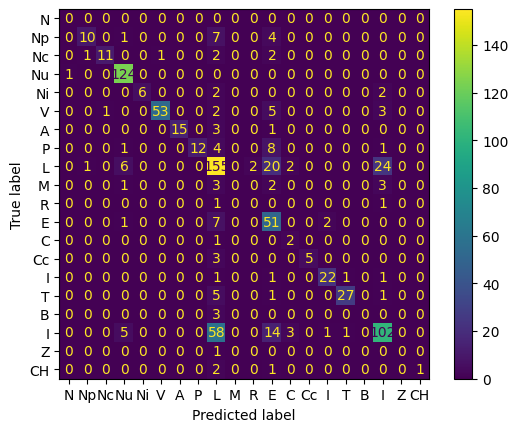

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
tag_list = ['N', 'Np', 'Nc', 'Nu', 'Ni', 'V', 'A', 'P', 'L', 'M', 'R', 'E', 'C', 'Cc', 'I', 'T', 'B', 'I', 'Z', 'CH']
cm = confusion_matrix(y_true_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tag_list).plot()

In [ ]:
# Dự đoán cho câu "Tôi yêu Việt Nam"
input_sentence = "Tiền_đạo Paulo_Josue nhận bóng trong thế quay lưng trước cấm_địa Hàn_Quốc."
input_words = preprocess(vocabs_dict, '/content/test_words.txt')

train_pred = viterbi_backward(best_probs_train, best_paths_train, train_words, states)
test_pred = viterbi_backward(best_probs_test, best_paths_test, test_words, states)
m = len(test_pred)

print('Dự đoán cho input_sentence[0:10]:')
print(input_sentence.split()[:20])
print(predicted_tags[:20])

Dự đoán cho input_sentence[0:10]:
['Tiền_đạo', 'Paulo_Josue', 'nhận', 'bóng', 'trong', 'thế', 'quay', 'lưng', 'trước', 'cấm_địa', 'Hàn_Quốc.']
['N', 'CH', 'Np', 'CH', 'Np', 'CH', 'N', 'V', 'N', 'CH', 'Np', 'V', 'N', 'N', 'N', 'E', 'N', 'N', 'N', 'E']
